### Example for using function load_data and printing dataset 

In [1]:
from hw3_utils import load_data
#downsample the training and validation dataset if needed, ds_rate should be larger than 1.
ds_rate=None
datasets = load_data(ds_rate=ds_rate,theano_shared=False)
train_set_x, train_set_y = datasets[0]
valid_set_x, valid_set_y = datasets[1]
test_set_x, test_set_y = datasets[2]
print('Current training data size is %i'%train_set_x.shape[0])
print('Current validation data size is %i'%valid_set_x.shape[0])
print('Current test data size is %i'%test_set_x.shape[0])

Current training data size is 40000
Current validation data size is 10000
Current test data size is 10000


Using gpu device 0: GRID K520 (CNMeM is disabled, cuDNN Version is too old. Update to v5, was 3007.)


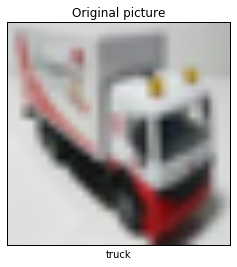

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
class_=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#Choose an image index
i=15
plt.imshow(np.reshape(valid_set_x[i],(3,32,32)).transpose(1,2,0))
plt.xticks([])
plt.yticks([])
plt.title('Original picture')
plt.xlabel('%s'%class_[valid_set_y[i]])

# ECBM E6040 Homework 3 - Programming Problem

### Problem 1: Implement the convolutional neural network depicted in this problem

In [2]:
from hw3 import test_lenet

In [2]:
test_lenet(batch_size=100, n_epochs=20000, learning_rate = 0.01)

... building the model
training @ iter =  0
training @ iter =  100
training @ iter =  200
training @ iter =  300
epoch 1, minibatch 400/400, validation error 68.250000 %
     epoch 1, minibatch 400/400, test error of best model 67.400000 %
training @ iter =  400
training @ iter =  500
training @ iter =  600
training @ iter =  700
epoch 2, minibatch 400/400, validation error 62.360000 %
     epoch 2, minibatch 400/400, test error of best model 62.190000 %
training @ iter =  800
training @ iter =  900
training @ iter =  1000
training @ iter =  1100
epoch 3, minibatch 400/400, validation error 58.540000 %
     epoch 3, minibatch 400/400, test error of best model 59.090000 %
training @ iter =  1200
training @ iter =  1300
training @ iter =  1400
training @ iter =  1500
epoch 4, minibatch 400/400, validation error 55.830000 %
     epoch 4, minibatch 400/400, test error of best model 56.360000 %
training @ iter =  1600
training @ iter =  1700
training @ iter =  1800
training @ iter =  1900
e

The training process for function test_lenet ran for 12.86m


### Problem 2: Refernce

In [1]:
from hw3 import P2_lenet
P2_lenet(batch_size=100, n_epochs=20000, learning_rate = 0.01)

Using gpu device 0: GRID K520 (CNMeM is disabled, cuDNN Version is too old. Update to v5, was 3007.)
/home/ubuntu/miniconda2/envs/theano/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


... building the model
training @ iter =  0
training @ iter =  100
training @ iter =  200
training @ iter =  300
epoch 1, minibatch 400/400, validation error 67.400000 %
     epoch 1, minibatch 400/400, test error of best model 67.400000 %
training @ iter =  400
training @ iter =  500
training @ iter =  600
training @ iter =  700
epoch 1, minibatch 400/400, validation error 62.190000 %
     epoch 1, minibatch 400/400, test error of best model 62.190000 %
training @ iter =  800
training @ iter =  900
training @ iter =  1000
training @ iter =  1100
epoch 2, minibatch 400/400, validation error 59.090000 %
     epoch 2, minibatch 400/400, test error of best model 59.090000 %
training @ iter =  1200
training @ iter =  1300
training @ iter =  1400
training @ iter =  1500
epoch 2, minibatch 400/400, validation error 56.360000 %
     epoch 2, minibatch 400/400, test error of best model 56.360000 %
training @ iter =  1600
training @ iter =  1700
training @ iter =  1800
training @ iter =  1900
e

The training process for function <module> ran for 13.56m


Reference validation accuracy (63.020000%)

### Problem 2: Bullet 1: Augmentation by translation

Show a 4*4 figure of 16 input images with this augmentation

Translated Images:


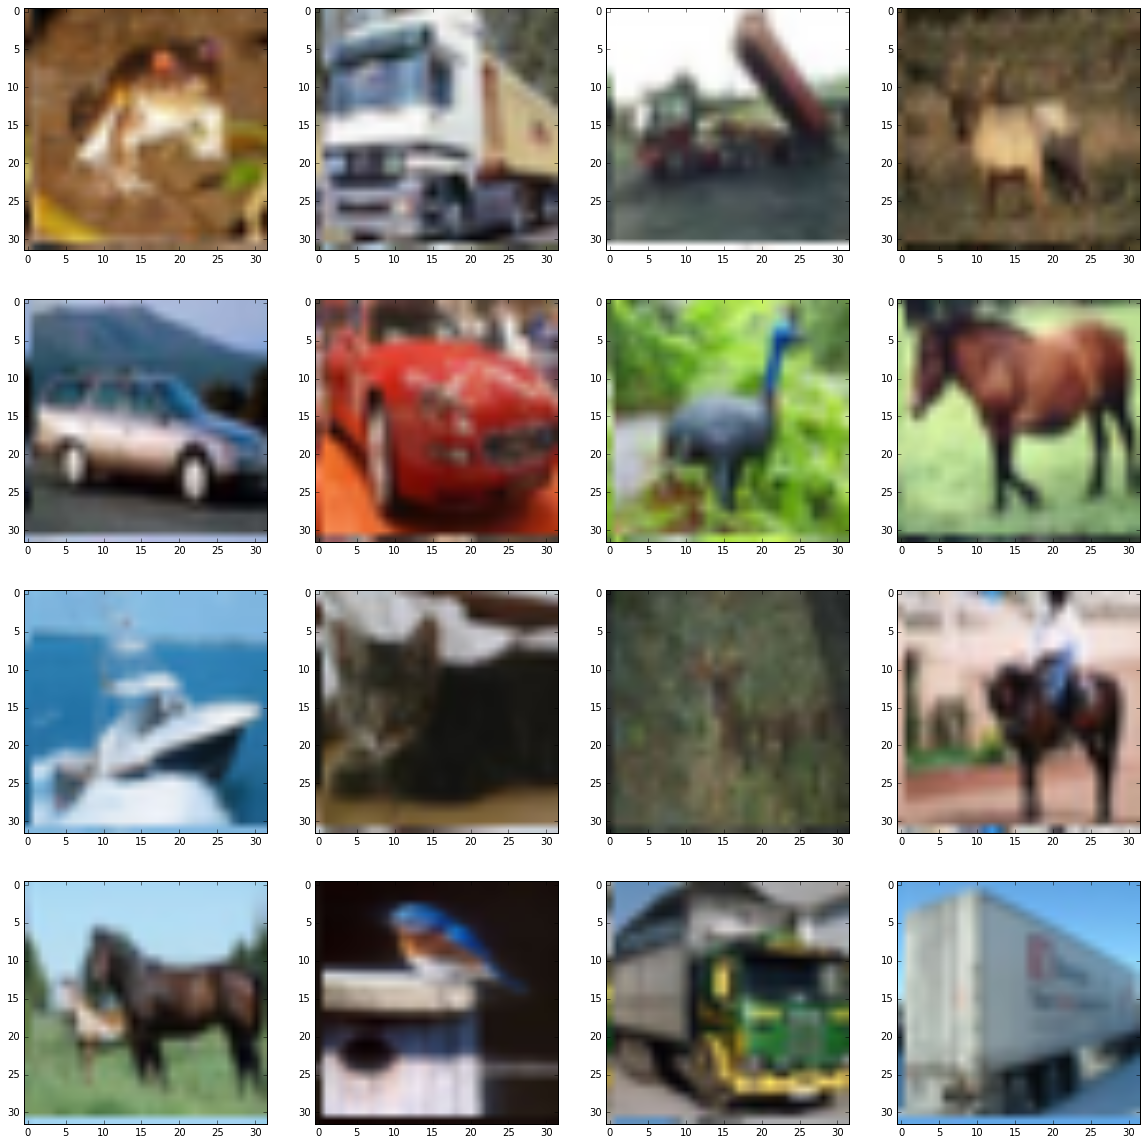

In [2]:
%matplotlib inline
from hw3_utils import load_data
from hw3 import translate_image
import matplotlib.pyplot as plt
import numpy as np
import random
from theano import shared

#downsample the training and validation dataset if needed, ds_rate should be larger than 1.
ds_rate=None
datasets = load_data(ds_rate=ds_rate,theano_shared=True)
train_set_x, train_set_y = datasets[0]

# get 16 images from train_x_set
images_tmp = shared(train_set_x.get_value()[0:16])

# call translation
ran_1 = int(random.uniform(-3,3))
ran_2 = int(random.uniform(-3,3))
translate_image(images_tmp, ran_1, ran_2)

images_printed = images_tmp.get_value()

# plot 4*4 images
print "Translated Images:"
f, axarr = plt.subplots(4,4,figsize=(20,20))
for i in range(4):
    for j in range(4):
        plt.axes(axarr[i,j])
        plt.imshow(np.transpose(images_printed[i*4+j].reshape(3,32,32),(1,2,0))) 
        

Implement the neural network with this augmentation, show the improvement

In [2]:
# (-3,3) # not counting augmented data
from hw3 import test_lenet_translation
test_lenet_translation(batch_size=100, n_epochs=20000, learning_rate = 0.01)

... building the model
-----Training with augmented data-----
-----Training over-----
training @ iter =  0
training @ iter =  100
training @ iter =  200
training @ iter =  300
epoch 1, minibatch 400/400, validation error 62.260000 %
     epoch 1, minibatch 400/400, test error of best model 62.260000 %
-----Training with augmented data-----
-----Training over-----
training @ iter =  400
training @ iter =  500
training @ iter =  600
training @ iter =  700
epoch 2, minibatch 400/400, validation error 59.860000 %
     epoch 2, minibatch 400/400, test error of best model 59.860000 %
-----Training with augmented data-----
-----Training over-----
training @ iter =  800
training @ iter =  900
training @ iter =  1000
training @ iter =  1100
epoch 3, minibatch 400/400, validation error 52.450000 %
     epoch 3, minibatch 400/400, test error of best model 52.450000 %
-----Training with augmented data-----
-----Training over-----
training @ iter =  1200
training @ iter =  1300
training @ iter =  1

The training process for function <module> ran for 25.53m


Best validation accuracy: 64.970000%.

1.95% better than reference validation accuracy (63.020000%)

### Problem 2: Bullet 2: Augmentation by rotation

Show a 4*4 figure of 16 input images with this augmentation

Using gpu device 0: GRID K520 (CNMeM is disabled, cuDNN Version is too old. Update to v5, was 3007.)
/home/ubuntu/miniconda2/envs/theano/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


Translated Images:


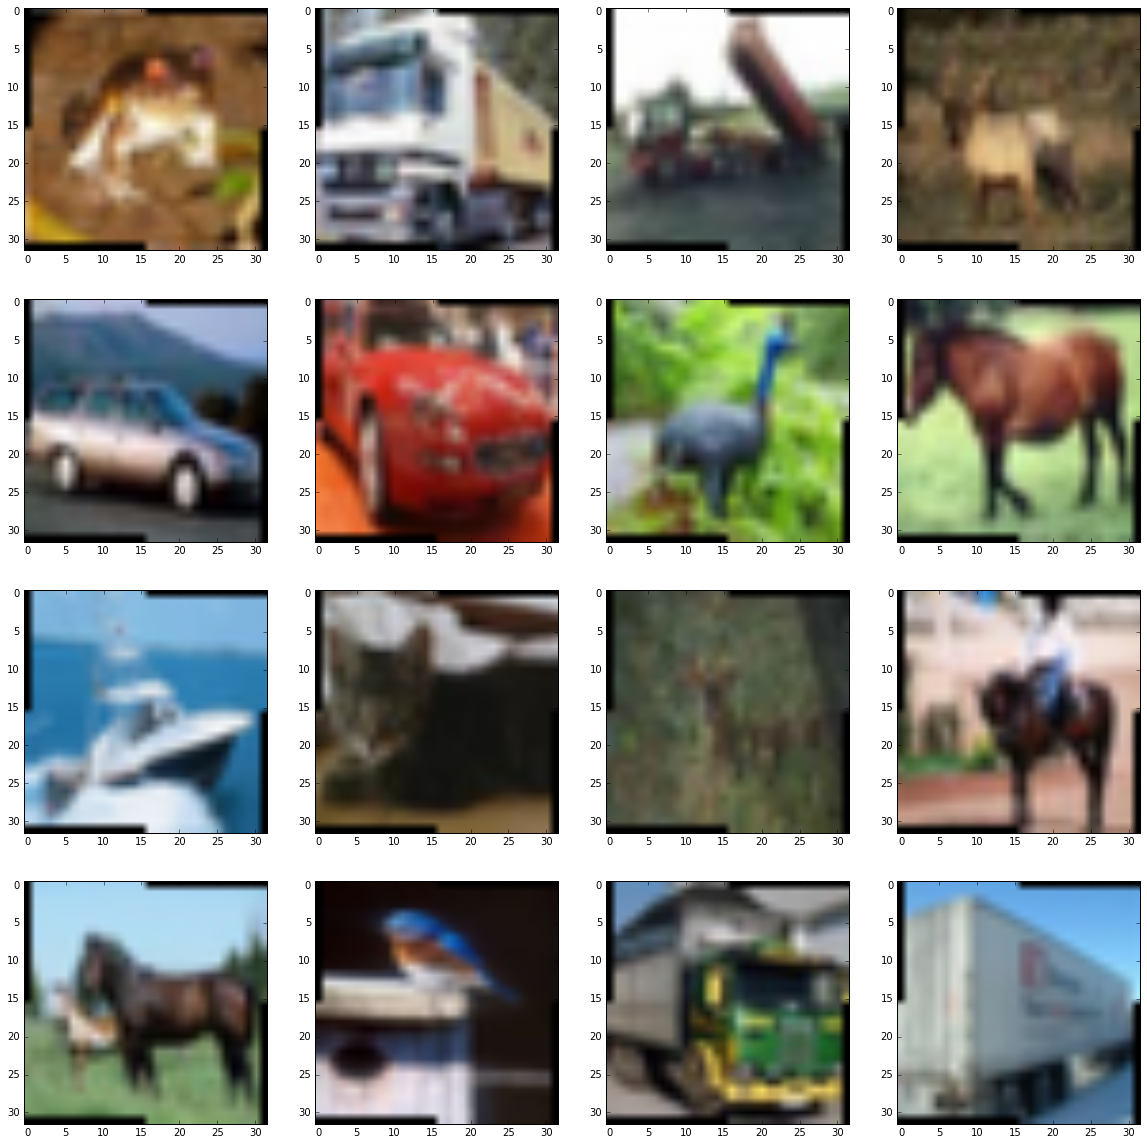

In [1]:
%matplotlib inline
from hw3_utils import load_data
from hw3 import rotate_image
import matplotlib.pyplot as plt
import numpy as np
import random
from theano import shared

#downsample the training and validation dataset if needed, ds_rate should be larger than 1.
ds_rate=None
datasets = load_data(ds_rate=ds_rate,theano_shared=True)
train_set_x, train_set_y = datasets[0]

# get 16 images from train_x_set
images_tmp = shared(train_set_x.get_value()[0:16])

# call rotation
ran = int(random.uniform(-3,3))
rotate_image(images_tmp, ran, tackle_overflow=True)

images_printed = images_tmp.get_value()

# plot 4*4 images
print "Translated Images:"
f, axarr = plt.subplots(4,4,figsize=(20,20))
for i in range(4):
    for j in range(4):
        plt.axes(axarr[i,j])
        plt.imshow(np.transpose(images_printed[i*4+j].reshape(3,32,32),(1,2,0))) 

Implement the neural network with this augmentation, show the improvement

In [1]:
from hw3 import test_lenet_rotation
test_lenet_rotation(batch_size=100, n_epochs=20000, learning_rate = 0.01)

Using gpu device 0: GRID K520 (CNMeM is disabled, cuDNN Version is too old. Update to v5, was 3007.)
/home/ubuntu/miniconda2/envs/theano/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


... building the model
-----Training with augmented data-----
-----Training over-----
training @ iter =  0
training @ iter =  100
training @ iter =  200
training @ iter =  300
epoch 1, minibatch 400/400, validation error 62.190000 %
     epoch 1, minibatch 400/400, test error of best model 62.190000 %
-----Training with augmented data-----
-----Training over-----
training @ iter =  400
training @ iter =  500
training @ iter =  600
training @ iter =  700
epoch 2, minibatch 400/400, validation error 56.310000 %
     epoch 2, minibatch 400/400, test error of best model 56.310000 %
-----Training with augmented data-----
-----Training over-----
training @ iter =  800
training @ iter =  900
training @ iter =  1000
training @ iter =  1100
epoch 3, minibatch 400/400, validation error 51.830000 %
     epoch 3, minibatch 400/400, test error of best model 51.830000 %
-----Training with augmented data-----
-----Training over-----
training @ iter =  1200
training @ iter =  1300
training @ iter =  1

The training process for function <module> ran for 37.58m


Best validation accuracy: 63.160000%.

0.14% better than reference validation accuracy (63.020000%)

### Problem 2: Bullet 3: Augmentation by flipping

Show a 4*4 figure of 16 input images with this augmentation

Using gpu device 0: GRID K520 (CNMeM is disabled, cuDNN Version is too old. Update to v5, was 3007.)
/home/ubuntu/miniconda2/envs/theano/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


Translated Images:


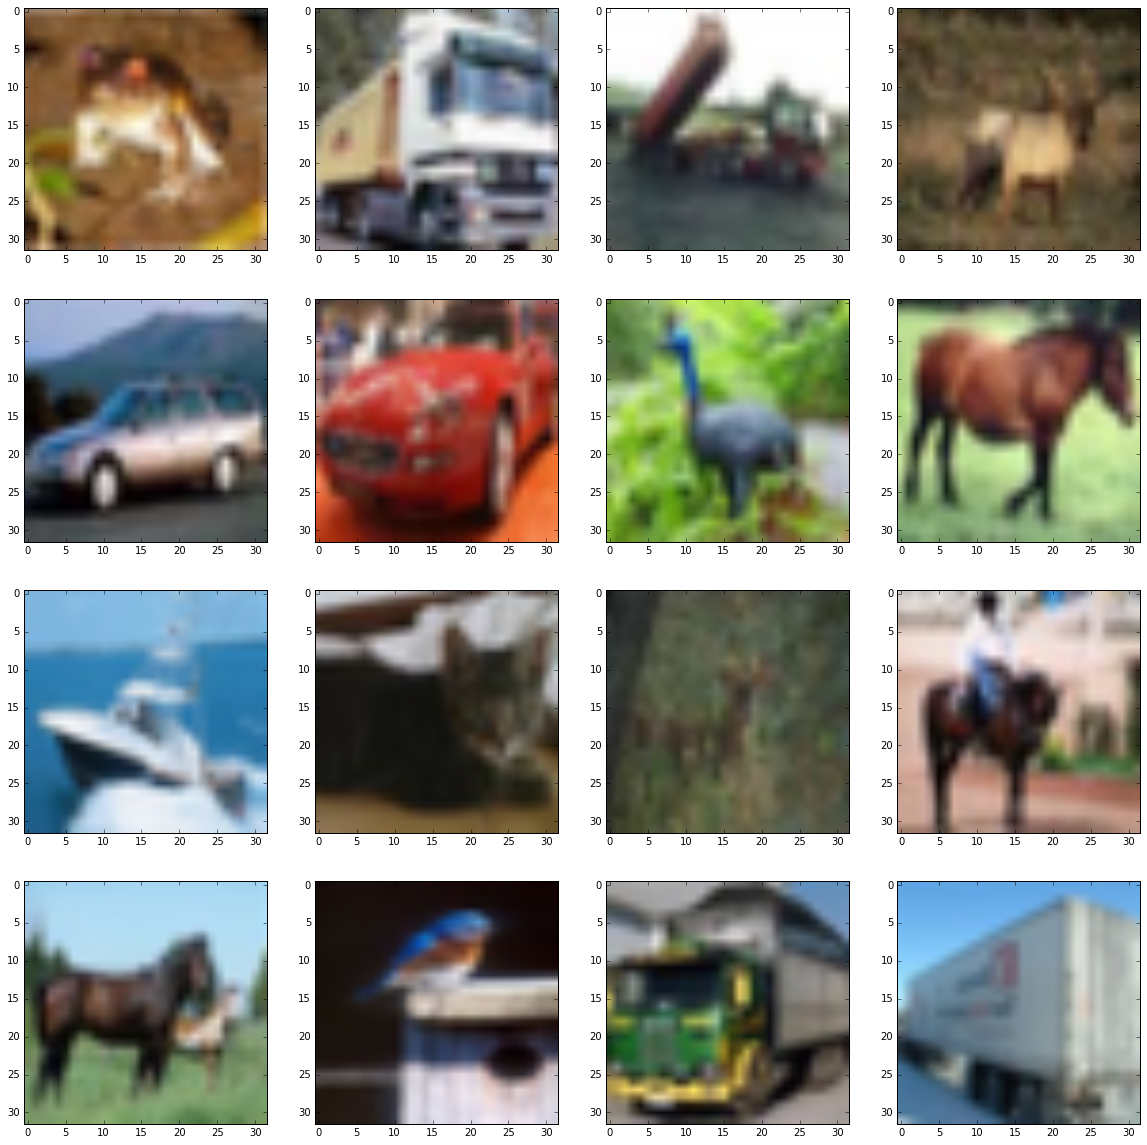

In [1]:
%matplotlib inline
from hw3_utils import load_data
from hw3 import flip_image
import matplotlib.pyplot as plt
import numpy as np
import random
from theano import shared

#downsample the training and validation dataset if needed, ds_rate should be larger than 1.
ds_rate=None
datasets = load_data(ds_rate=ds_rate,theano_shared=True)
train_set_x, train_set_y = datasets[0]

# get 16 images from train_x_set
images_tmp = shared(train_set_x.get_value()[0:16])

# call translation
flip_image(images_tmp, 1)

images_printed = images_tmp.get_value()

# plot 4*4 images
print "Translated Images:"
f, axarr = plt.subplots(4,4,figsize=(20,20))
for i in range(4):
    for j in range(4):
        plt.axes(axarr[i,j])
        plt.imshow(np.transpose(images_printed[i*4+j].reshape(3,32,32),(1,2,0))) 
        

Implement the neural network with this augmentation, show the improvement

In [1]:
from hw3 import test_lenet_flip
test_lenet_flip(batch_size=100, n_epochs=20000, learning_rate = 0.01)

Using gpu device 0: GRID K520 (CNMeM is disabled, cuDNN Version is too old. Update to v5, was 3007.)
/home/ubuntu/miniconda2/envs/theano/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


... building the model
-----Training with augmented data-----
-----Training over-----
training @ iter =  0
training @ iter =  100
training @ iter =  200
training @ iter =  300
epoch 1, minibatch 400/400, validation error 62.390000 %
     epoch 1, minibatch 400/400, test error of best model 62.390000 %
-----Training with augmented data-----
-----Training over-----
training @ iter =  400
training @ iter =  500
training @ iter =  600
training @ iter =  700
epoch 2, minibatch 400/400, validation error 56.280000 %
     epoch 2, minibatch 400/400, test error of best model 56.280000 %
-----Training with augmented data-----
-----Training over-----
training @ iter =  800
training @ iter =  900
training @ iter =  1000
training @ iter =  1100
epoch 3, minibatch 400/400, validation error 52.080000 %
     epoch 3, minibatch 400/400, test error of best model 52.080000 %
-----Training with augmented data-----
-----Training over-----
training @ iter =  1200
training @ iter =  1300
training @ iter =  1

The training process for function <module> ran for 24.69m


Best validation accuracy: 69.160000%.

6.14% better than reference validation accuracy (63.020000%)

### Problem 2: Bullet 4: Augmentation by injecting noise into input

Show a 4*4 figure of 16 input images with this augmentation

Using gpu device 0: GRID K520 (CNMeM is disabled, cuDNN Version is too old. Update to v5, was 3007.)
/home/ubuntu/miniconda2/envs/theano/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
Translated Images:


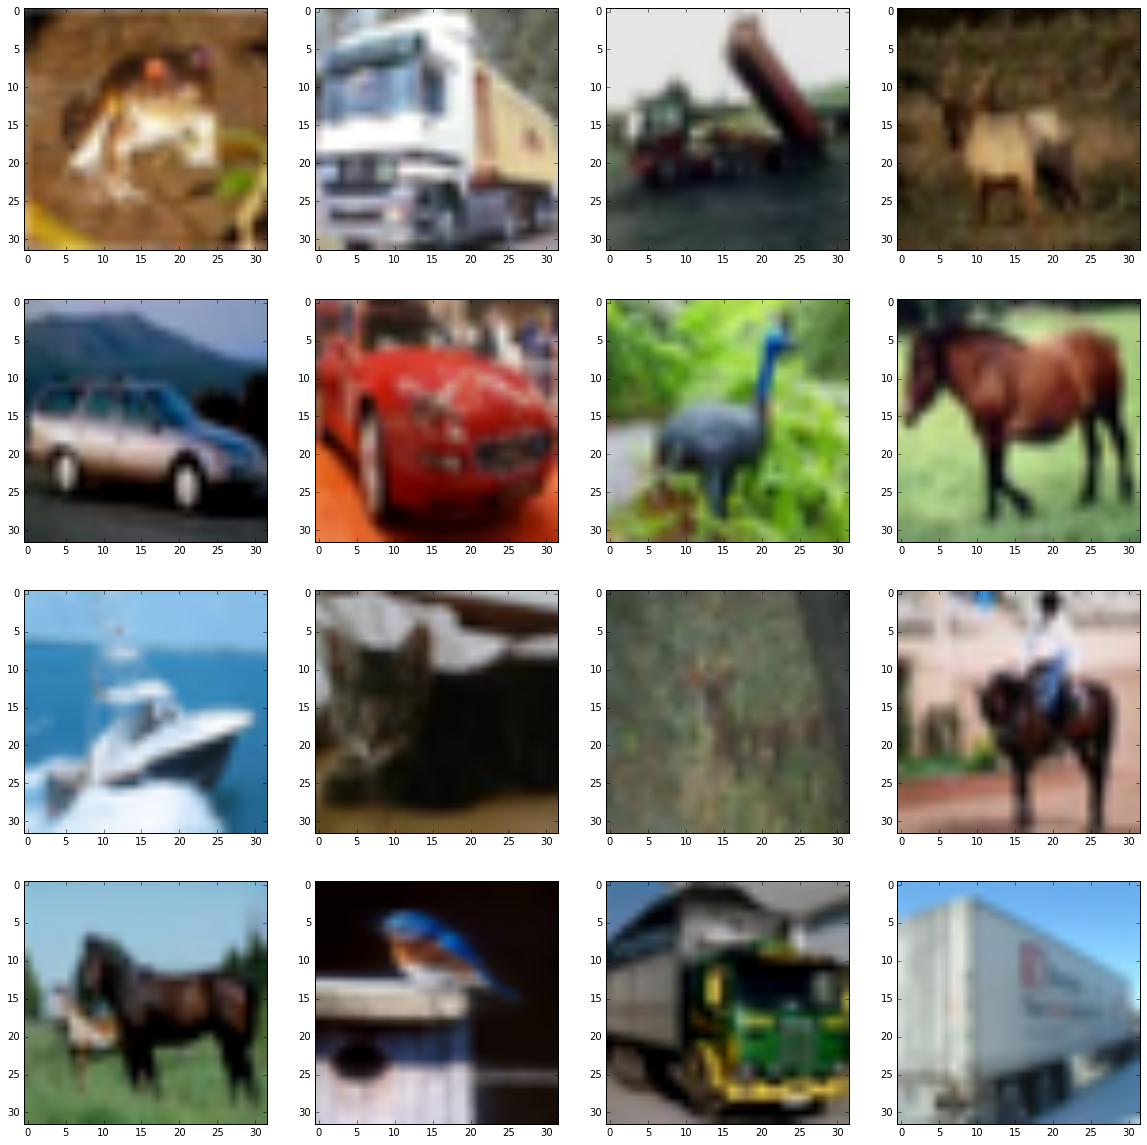

In [1]:
%time
%matplotlib inline
from hw3_utils import load_data
from hw3 import noise_injection
import matplotlib.pyplot as plt
import numpy as np
import random
from theano import shared

#downsample the training and validation dataset if needed, ds_rate should be larger than 1.
ds_rate=None
datasets = load_data(ds_rate=ds_rate,theano_shared=True)
train_set_x, train_set_y = datasets[0]

# get 16 images from train_x_set
images_tmp = shared(train_set_x.get_value()[0:16])

# call translation
ran = int(random.uniform(0,2))
noise_injection(images_tmp, ran, tackle_overflow=True)

images_printed = images_tmp.get_value()

# plot 4*4 images
print "Translated Images:"
f, axarr = plt.subplots(4,4,figsize=(20,20))
for i in range(4):
    for j in range(4):
        plt.axes(axarr[i,j])
        plt.imshow(np.transpose(images_printed[i*4+j].reshape(3,32,32),(1,2,0))) 

Implement the neural network with this augmentation, show the improvement

In [2]:
from hw3 import test_lenet_inject_noise_input
test_lenet_inject_noise_input(batch_size=100, n_epochs=20000, learning_rate = 0.01)

... building the model
-----Training with augmented data-----
-----Training over-----
training @ iter =  0
training @ iter =  100
training @ iter =  200
training @ iter =  300
epoch 1, minibatch 400/400, validation error 61.890000 %
     epoch 1, minibatch 400/400, test error of best model 61.890000 %
-----Training with augmented data-----
-----Training over-----
training @ iter =  400
training @ iter =  500
training @ iter =  600
training @ iter =  700
epoch 2, minibatch 400/400, validation error 56.690000 %
     epoch 2, minibatch 400/400, test error of best model 56.690000 %
-----Training with augmented data-----
-----Training over-----
training @ iter =  800
training @ iter =  900
training @ iter =  1000
training @ iter =  1100
epoch 3, minibatch 400/400, validation error 51.670000 %
     epoch 3, minibatch 400/400, test error of best model 51.670000 %
-----Training with augmented data-----
-----Training over-----
training @ iter =  1200
training @ iter =  1300
training @ iter =  1

The training process for function <module> ran for 24.90m


Best validation accuracy: 67.240000%.

4.22% better than reference validation accuracy (63.020000%)

### Problem 3: Implement your own achritecture to achieve at least 80% testing accuracy on CIFAR-10 test set

CNN Structure 1

Description:

layer0 = LeNetConvPoolLayer(filter_shape=(32, 3, 3, 3), poolsize=(2, 2), activation=T.tanh)

layer1 = LeNetConvPoolLayer(filter_shape=(64, 32, 3, 3), poolsize=(2, 2), activation=T.tanh)

layer2 = DropoutHiddenLayer(n_in=64*8*8, n_out=4096, activation=T.tanh, p=0.7)

layer3 = DropoutHiddenLayer(n_in=4096, n_out=512, activation=T.tanh, p=0.7)

layer4 = LogisticRegression(n_in=512, n_out=10)

With augmentated data (flip)

patience = 20000

Best test accuracy: 72.430000%

In [1]:
from hw3 import MY_lenet
import theano.tensor as T

MY_lenet(batch_size=100, n_epochs=2000, learning_rate = 0.01, L2_reg = 0.0001, activation=T.tanh)

Using gpu device 0: GRID K520 (CNMeM is disabled, cuDNN Version is too old. Update to v5, was 3007.)
/home/ubuntu/miniconda2/envs/theano/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


... building the model
-----Training with augmented data (flip)-----
-----Training over-----
epoch 1, train augmented data (flip), validation error 72.410000 %
training @ iter =  0
training @ iter =  100
training @ iter =  200
training @ iter =  300
epoch 1, minibatch 400/400, validation error 68.080000 %
     epoch 1, minibatch 400/400, test error of best model 66.930000 %
-----Training with augmented data (flip)-----
-----Training over-----
epoch 2, train augmented data (flip), validation error 63.700000 %
training @ iter =  400
training @ iter =  500
training @ iter =  600
training @ iter =  700
epoch 2, minibatch 400/400, validation error 60.720000 %
     epoch 2, minibatch 400/400, test error of best model 60.110000 %
-----Training with augmented data (flip)-----
-----Training over-----
epoch 3, train augmented data (flip), validation error 58.550000 %
training @ iter =  800
training @ iter =  900
training @ iter =  1000
training @ iter =  1100
epoch 3, minibatch 400/400, validati

The training process for function MY_lenet ran for 176.03m


### Problem 4: Implement the convolutional neural network depicted in this problem

Using gpu device 0: GRID K520 (CNMeM is disabled, cuDNN Version is too old. Update to v5, was 3007.)
/home/ubuntu/miniconda2/envs/theano/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


... building the model
... training the model
training @ iter =  0
training @ iter =  100
training @ iter =  200
training @ iter =  300
epoch 1, minibatch 400/400, validation cost 0.016385
training @ iter =  400
training @ iter =  500
training @ iter =  600
training @ iter =  700
epoch 2, minibatch 400/400, validation cost 0.013312
training @ iter =  800
training @ iter =  900
training @ iter =  1000
training @ iter =  1100
epoch 3, minibatch 400/400, validation cost 0.011694
training @ iter =  1200
training @ iter =  1300
training @ iter =  1400
training @ iter =  1500
epoch 4, minibatch 400/400, validation cost 0.010816
training @ iter =  1600
training @ iter =  1700
training @ iter =  1800
training @ iter =  1900
epoch 5, minibatch 400/400, validation cost 0.010087
training @ iter =  2000
training @ iter =  2100
training @ iter =  2200
training @ iter =  2300
epoch 6, minibatch 400/400, validation cost 0.009574
training @ iter =  2400
training @ iter =  2500
training @ iter =  2600


/home/ubuntu/miniconda2/envs/theano/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
The training process for function MY_CNN ran for 256.80m


Best validation cost 0.006044 obtained at iteration 12000, 


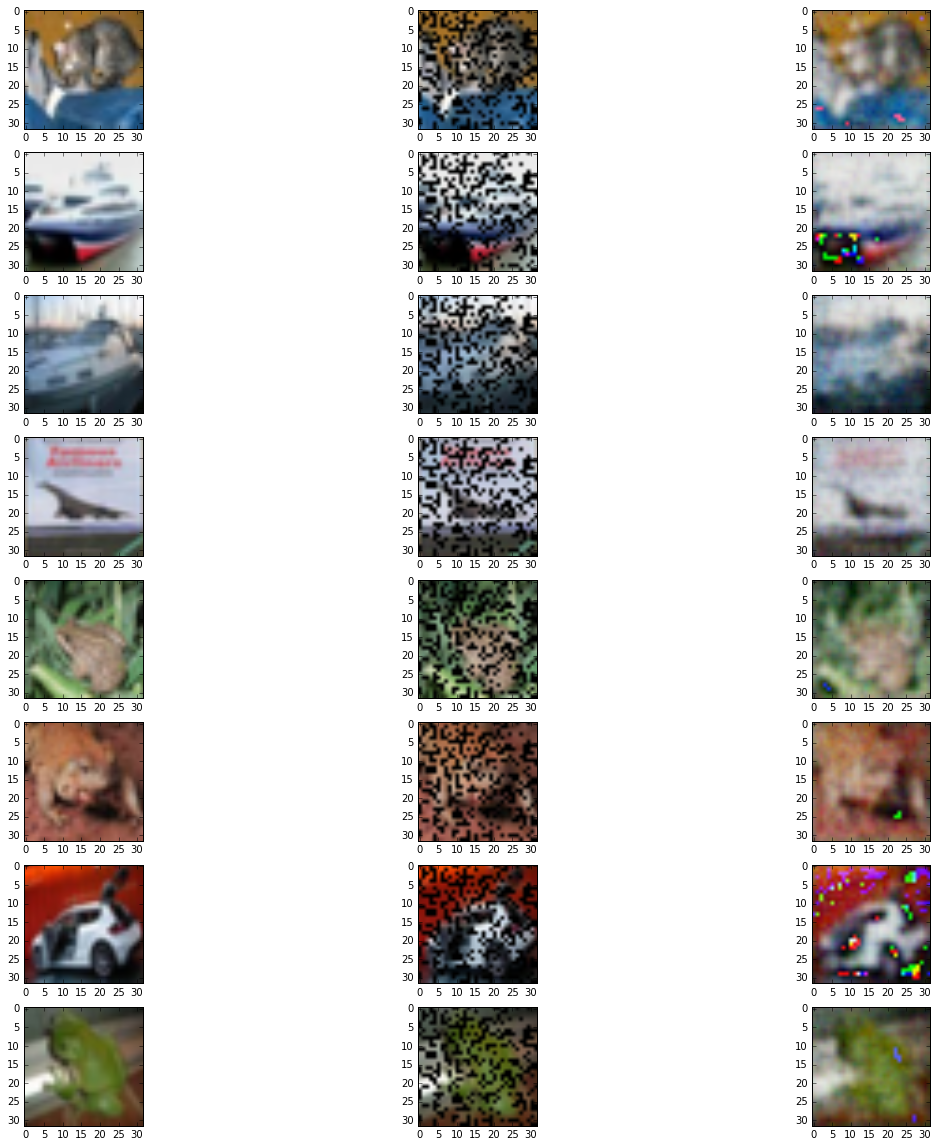

In [1]:
%matplotlib inline
from hw3 import MY_CNN
MY_CNN(batch_size=100, n_epochs=128, learning_rate = 0.01, patience = 9000)

The reconstructed images didn't tackle the overflow of color.

As inspection, if the dropout pixel merged together, the recontructed pixel around the merged point had more posibility to suffer from overflow.

After reconsruction, the original pixel (didn't dropout) changed and the overall result was blurry.